Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [1]:
using Causality

In [109]:
using SparseArrays, LinearAlgebra
T, N = 20.0, 150
ρ = 3/N
Λ = sprand(N, N, ρ, n->fill(true, n)) |> x->tril(x,-1) |> x->x+x'

150×150 SparseMatrixCSC{Int64, Int64} with 448 stored entries:
⠠⠂⢁⠀⠀⢀⠅⠀⠀⢀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠁⠂⠒⠀⠀⢀⠀⢀⠀⠄⠤⠀⠀⡀⡀⠀⢀⠀⠀⠀⠀
⠁⠐⠀⠀⡀⠐⠀⠀⠁⢀⡀⠐⠀⠀⠀⠀⡠⠀⠀⠀⠀⠀⠈⠄⠀⠀⠂⢄⠀⠀⠀⠀⠄⠀⠀⠠⡂⠀⠀⠀
⠀⢀⢀⠈⠀⠀⠀⠁⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠈⢀⢀⢀⠀⠄⠀⠠⠀⡀⢀⠀⠀⢀⠀
⠁⠁⠀⠀⠄⠀⠀⠀⠀⠰⠁⠄⠀⠀⠀⠀⠠⠂⠀⠂⢠⠂⠈⠄⠀⠀⡂⠀⠀⠀⠀⠐⠄⠐⡈⠀⠅⡀⢀⠀
⠀⢀⠁⢀⡀⠀⢀⡀⠀⠀⠀⠜⠰⢑⢄⠁⠂⡀⠁⡀⠀⢀⠀⠀⠀⠀⠀⢂⠐⠑⢀⠂⠄⠀⠠⠀⢀⠀⠀⠀
⢀⠀⢀⠈⠀⠀⠁⠄⣀⠄⠊⠀⠡⠈⠀⠀⠂⠀⠀⠀⠀⠁⡆⠠⠀⡀⠀⠀⠀⠀⠂⠀⠀⢀⠀⠐⠀⠀⠀⡀
⠀⠀⠀⠀⠀⠀⠀⠀⢔⢂⡁⠂⠀⠀⢀⠈⠀⠀⢀⡄⠂⠀⠀⠀⠀⠀⠀⠈⠀⠀⡀⢁⢀⠀⠀⠀⠀⡁⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠄⠑⠀⠀⡀⠐⢤⠓⠀⢀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠁⡐⠀⠀⠀⠂⢰⠐⠈⠀⡂⡀⠀
⠀⠀⠀⠊⠀⠀⠠⠂⠈⠠⠈⠀⠀⠀⠀⢀⠀⠀⠁⠁⠀⠃⠐⠃⠀⠀⠀⠀⠀⠀⠀⠠⠀⡀⡑⠀⠀⠀⠠⡀
⠄⠀⠀⠀⠀⠀⠠⠀⠁⠠⠀⠀⠀⠴⠀⠀⠅⠀⠀⠀⠀⠁⠀⠀⠁⠀⠀⠀⠀⠀⠀⠁⠁⠀⠀⠂⠀⢀⠀⠀
⢨⠀⠀⠀⠁⠀⠠⠒⠀⢀⠄⠀⠈⠀⠀⠀⠤⠀⠄⠀⠀⠀⠀⠀⠉⠀⡄⠉⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠐⠀
⠀⠀⠂⠄⠀⠀⠂⠄⠀⠀⠈⡉⠀⠀⠀⠀⠴⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠨⠄⠀⣠⡀⠀⠀⠀⠀⠀⠀
⠀⠐⠀⠀⡀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠐⠀⠀⠀⠁⠀⠃⠀⠀⠀⠀⠀⢆⠄⠈⠐⡀⠐⠀⣠⡂⠀⡀⠀⠀⠀
⠀⠐⠈⢄⠀⢐⠈⠈⠠⢀⠀⠀⡀⠀⠄⠀⠀⠀⠀⠀⡄⠉⠁⠀⠈⠕⠀⠀⠀⠀⠀⡠⠀⠀⠀⢀⠔⠠⠀⡂
⠀⡅⠀⠀⠀⠐⠀⠀⢔⠀⠀⠀⠀⠀⠐⠈⠀⠀⠀⠀⠀⠀⡀⡀⢂⠀⠀⠀⠀⠀⠄⠄⠀⠀⠀⠂⢀⠀⠀⠈
⠀⠀⠀⠀⠀⠁⢀⠀⠠⠐⠈⠀⠄⢈⠀⠀⠀⡀⠄⠀⠀⠀⠀⠁⢀⠈⠀⡠⠀⠅⠀⠀⠀⠀⠠⡀⠀⠄⠀⠀
⠀⠨⠀⠁⠀⠂⢀⠁⠀⠁⠀⢀⠀⠐⢈⣀⠀⠠⠁⠀⠀⠀⠀⠺⠀⣠⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠄⠀
⠀⢀⠀⡀⠀⢈⠂⠈⠀⠂⢀⠀⠀⠀⡐⠀⠑⠈⠠⠀⠀⠂⠀⠀⠈⠈⠀⢀⠠⠀⠀⠢⠀⢀⠀⠀⠀⠀⠁⢄
⠀⠀⠈⠈⠀⠀⠁⠡⠀⠐⠀⠀⠄⠠⠠⠠⠀⠀⠀⢀⠀⠀⠀⠀⠀⠈⠐⡁⠀⠐⠀⠄⠀⠀⠀⠀⠀⡠⠁⠀
⠀⠀⠀⠀⠀⠐⠀⠐⠀⠀⠀⠠⠀⠀⠀⠈⠀⠢⠀⠀⠐⠀⠀⠀⠀⠀⠠⠠⡀⠀⠀⠀⠀⠁⠁⢄⠁⠀⠀⠀

In [110]:

getpar(p,a1,b1,c1,a2,b2,c2) = [fill(p, 1, N);
     fill(a1, 1, N); fill(b1, 1, N); fill(c1, 1, N);
     fill(a2,   1, N); fill(b2, 1, N); fill(c2, 1, N)]

getpar (generic function with 1 method)

In [118]:
εp = 1e-10
λ = 0.1
θp = getpar(1/N, εp, T/2, 1/εp,   λ, T/2, 1/εp)
Mp = StochasticModel(T, θp, Λ, GaussianRate, GaussianRate);


sample! = Sampler(Mp)
xtrue = zeros(N)
sample!(xtrue)
sum(xtrue .< T)

70

In [119]:
εp2 = 1e-3
θp2 = getpar(1/N, εp2, T/2, 1/εp2,   λ, T/2, 1/εp2)
Mp2 = StochasticModel(T, θp2, Λ, GaussianRate, GaussianRate);

In [120]:
θ = copy(θp2)
θmin = getpar(εp  , εp  ,  -T,   εp,   εp,  -T, εp  )
θmax = getpar(1-εp, 1/εp,  2T, 1/εp, 1/εp,  2T, 1/εp)
M = StochasticModel(T, θ, Λ, GaussianRate, GaussianRate);

In [121]:
nobs, p = Int(round(N/4)), 1e-5
O = [(ti = T*(1+rand())/2; (i,xtrue[i] < ti,ti,p)) for i=1:nobs];

In [126]:
function causMethod(M_, Mp2_, θmin_, θmax_, O)
    N = size(M_.θ,2)
    Fmemory = zeros(5)
    samp = max(10 * N,150)
    avgF = 0
    treshold = 0.01
    count = 0
    while true
        stat = mod(count,5)+1
        count += 1
        count2 = 0
        Fmemory2 = zeros(5)
        while true        
            stat2 = mod(count2,5)+1
            count2 +=1
            avgF2 = sum(Fmemory2)/5
            stdF2 = sqrt(sum(Fmemory2 .^ 2)/5 - avgF2^2)
            Fmemory2[stat2] = descend!(Mp2_, O; M=M_, numsamples=samp, numiters=1, 
                    θmin=θmin_, θmax=θmax_, descender=SignDescender(0.1));  
            if count2>5 && (stdF2/avgF2< 3*treshold || Fmemory2[mod(count2-1,5)+1]>Fmemory2[mod(count2-5,5)+1])
                break
            end
            @show Fmemory2
        end
        Fmemory[stat] = sum(Fmemory2)/5
        avgF = sum(Fmemory)/5
        stdF = sqrt(sum(Fmemory .^ 2)/5 - avgF^2)
        if count>5 && (stdF/avgF<treshold || Fmemory[mod(count-1,5)+1]>Fmemory[mod(count-5,5)+1])
            break
        end
        samp += N
    end
    descend!(Mp2_, O; M=M_, numsamples=samp, numiters=50, 
                        θmin=θmin_, θmax=θmax_, descender=SignDescender(0.1));
    descend!(Mp2_, O; M=M_, numsamples=samp, numiters=50, 
                        θmin=θmin_, θmax=θmax_, descender=SignDescender(0.03));
    avgF = descend!(Mp2_, O; M=M_, numsamples=samp, numiters=20, 
                        θmin=θmin_, θmax=θmax_, descender=SignDescender(0.01));
    println("N=$N F=$avgF samples=$samp")
end

causMethod (generic function with 1 method)

In [128]:
a=time()
causMethod(M, Mp2, θmin, θmax, O)
b=time()
println("time=$(b-a)")

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/students/mmariani/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress: 100%|█████████████████████████████████████████| Time: 0:00:11
  F:  30.84815085163918


N=150 F=30.84815085163918 samples=2250
time=86.73366713523865


In [130]:
samp=5000

descend!(Mp2, O; M=M, numsamples=samp, numiters=50, 
                        θmin=θmin, θmax=θmax, descender=SignDescender(0.1));

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/students/mmariani/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress:  20%|████████▎                                |  ETA: 0:00:52
  F:  35.77791002999042

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
     [1] [0m[1m(::Causality.var"#19#20"{Vector{Float64}, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64})[22m[0m[1m([22m[90mv[39m::[0mVector[90m{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#19#20"{Vector{Float64}, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64}, Float64}, Float64, 7}}[39m[0m[1m)[22m
    [90m   @ [39m[35mCausality[39m [90m~/git/Causality/src/[39m[90m[4mvariation.jl:77[24m[39m
     [2] [0m[1mvector_mode_dual_eval![22m
    [90m   @ [39m[90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mapiutils.jl:37[24m[39m[90m [inlined][39m
     [3] [0m[1mvector_mode_gradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#19#20"[90m{Vector{Float64}, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64}[39m, [90mx[39m::[0mVector[90m{Float64}[39m, [90mcfg[39m::[0mForwardDiff.GradientConfig[90m{ForwardDiff.Tag{Causality.var"#19#20"{Vector{Float64}, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64}, Float64}, Float64, 7, Vector{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#19#20"{Vector{Float64}, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64}, Float64}, Float64, 7}}}[39m[0m[1m)[22m
    [90m   @ [39m[36mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mgradient.jl:113[24m[39m
     [4] [0m[1mgradient![22m
    [90m   @ [39m[90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mgradient.jl:37[24m[39m[90m [inlined][39m
     [5] [0m[1mgradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#19#20"[90m{Vector{Float64}, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64}[39m, [90mx[39m::[0mVector[90m{Float64}[39m, [90mcfg[39m::[0mForwardDiff.GradientConfig[90m{ForwardDiff.Tag{Causality.var"#19#20"{Vector{Float64}, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64}, Float64}, Float64, 7, Vector{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#19#20"{Vector{Float64}, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64}, Float64}, Float64, 7}}}[39m[0m[1m)[22m[90m (repeats 2 times)[39m
    [90m   @ [39m[36mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mgradient.jl:35[24m[39m
     [6] [0m[1mgradient![22m[0m[1m([22m[90mdθ[39m::[0mMatrix[90m{Float64}[39m, [90mx[39m::[0mVector[90m{Float64}[39m, [90mM[39m::[0mStochasticModel[90m{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}[39m[0m[1m)[22m
    [90m   @ [39m[35mCausality[39m [90m~/git/Causality/src/[39m[90m[4mvariation.jl:77[24m[39m
     [7] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:58[24m[39m[90m [inlined][39m
     [8] [0m[1m(::Causality.var"#11#threadsfor_fun#18"{StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Vector{Causality.var"#sample!#21"{StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, DataStructures.PriorityQueue{Int64, Float64, Base.Order.ForwardOrdering}, BitVector, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Vector{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [9] [0m[1m(::Causality.var"#11#threadsfor_fun#18"{StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Int64, StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Vector{Causality.var"#sample!#21"{StochasticModel{Float64, Matrix{Float64}, SparseMatrixCSC{Int64, Int64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, UnitRange{Int64}}, true}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}, Vector{GaussianRate{SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}, SubArray{Float64, 0, Matrix{Float64}, Tuple{Int64, Int64}, true}}}}, DataStructures.PriorityQueue{Int64, Float64, Base.Order.ForwardOrdering}, BitVector, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Vector{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[35mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [98]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [136]:
N

20

In [ ]:
[10 20 40 60 100]
[300 400 900  ??  1800]

In [99]:
stats = post(Mp, O)

Progress:   0%|                                         |  ETA: 6:31:09

LoadError: InterruptException:

In [100]:
causample! = Sampler(M)
statscau = prior(causample!)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


100×100000 Matrix{Float64}:
 20.0      20.0     20.0      20.0      …  16.7131   17.0983   20.0
 16.5459   15.7842  20.0      20.0         20.0      13.3075   20.0
 20.0      20.0     20.0      20.0         20.0      15.51     20.0
 20.0      20.0     20.0      20.0         20.0      17.3282   20.0
 13.0862   13.9855  15.2188   14.5721      14.9632   13.9695   15.6857
  5.63722   0.0      6.63018   3.57056  …   5.67276   3.28146   4.05692
  6.02649   5.1087   7.84731   0.0          4.69832   8.04297   9.97782
 20.0      20.0     20.0      20.0         20.0      20.0      20.0
 20.0      20.0     20.0      20.0         20.0      20.0      20.0
 20.0      20.0     20.0      18.5083      20.0      20.0      20.0
 20.0      20.0     20.0      20.0      …  20.0      20.0      20.0
 16.7557   16.5293  19.9053   16.1736      15.493    20.0      20.0
 20.0      20.0     20.0      20.0         20.0      20.0      20.0
  ⋮                                     ⋱                      
 20.0      20

In [101]:
O

25-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 11.202235070639823, 1.0e-5)
 (2, 0, 11.800971387232892, 1.0e-5)
 (3, 0, 12.230310130486801, 1.0e-5)
 (4, 0, 10.303069036371744, 1.0e-5)
 (5, 1, 19.028747781281364, 1.0e-5)
 (6, 1, 11.725375427165217, 1.0e-5)
 (7, 1, 13.03930587993917, 1.0e-5)
 (8, 0, 16.9669057901803, 1.0e-5)
 (9, 0, 19.741897742253784, 1.0e-5)
 (10, 0, 11.065015611254836, 1.0e-5)
 (11, 0, 13.872130549306146, 1.0e-5)
 (12, 0, 12.306328631285943, 1.0e-5)
 (13, 0, 14.488067158945704, 1.0e-5)
 (14, 0, 12.328949667395285, 1.0e-5)
 (15, 0, 11.245712353622292, 1.0e-5)
 (16, 0, 17.208393196907004, 1.0e-5)
 (17, 0, 15.239540924539675, 1.0e-5)
 (18, 0, 16.221884062533434, 1.0e-5)
 (19, 0, 19.557169228396653, 1.0e-5)
 (20, 0, 12.347466520028537, 1.0e-5)
 (21, 1, 16.592441572211175, 1.0e-5)
 (22, 0, 13.778879711091257, 1.0e-5)
 (23, 0, 16.85265305081057, 1.0e-5)
 (24, 0, 17.672662617313573, 1.0e-5)
 (25, 0, 11.340250841863408, 1.0e-5)

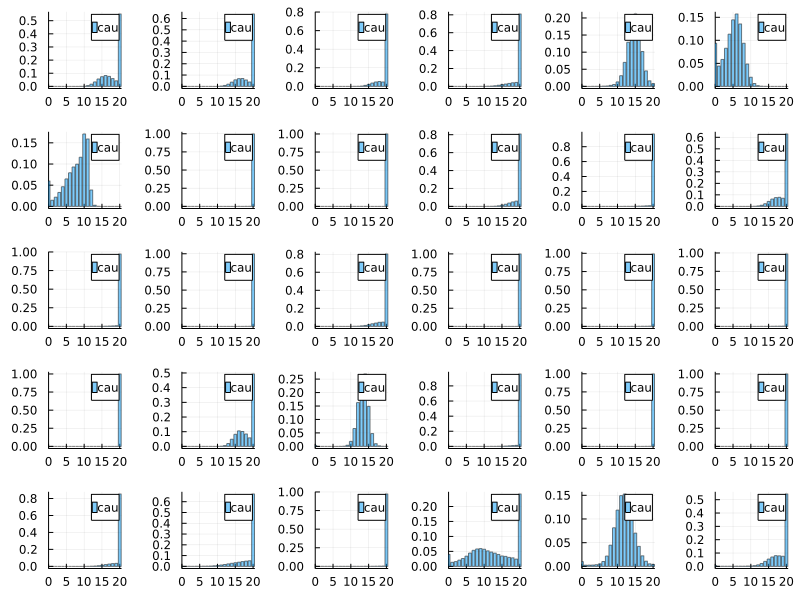

In [105]:
using Plots
pl = map(1:30) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[k,:]), up=M.T), alpha=0.5, legend=true, xlims=(0,M.T+0.5), bins=20, label="cau");
    #bar!(p, 0:M.T/20:M.T, histo((@view stats[k,:]), up=M.T),    alpha=0.5, legend=true, xlims=(0,M.T+0.5), bins=20, label="true");
end;
plot(pl..., size=(800,600))